In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras import Sequential, layers, optimizers, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [10]:
df = pd.read_csv('HIV_AIDS.csv',delimiter=';')
df.head(3)

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
0,2011.0,All,All,All,All,All,3379.0,02/01/1900 00.03,640,66,2366,33.08.00,1.01,71,2040,13.06,05.08,07.08
1,2011.0,All,All,Male,All,All,NaN,79.01.00,480,66,1712,52.02.00,1.07,72,1423,13.04,05.07,07.07
2,2011.0,All,All,Female,All,All,733.0,21.01,153,66,622,17.06,0.06,68,605,14,6,8


Split data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
y_train

2673                All
5631                All
5836                All
2348              Black
5331                All
             ...       
3772                All
5191      Other/Unknown
5226              Black
5390    Latino/Hispanic
860               Black
Name: Race, Length: 4804, dtype: object

In [14]:
y_test

79                         All
3043                       All
4851                     Black
1168                       All
3573    Asian/Pacific Islander
                 ...          
1611    Asian/Pacific Islander
2746                       All
4374                       All
3378                       All
1554                       All
Name: Race, Length: 1201, dtype: object

In [19]:
X_train

,Year,Borough,UHF,Gender,Age,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
2673,2013.0,Brooklyn,Bedford Stuyvesant - Crown Heights,Male,All,130.0,111.02.00,27,65,89,76.01.00,3.01,76,95,15.01,07.04,07.07
5631,2015.0,Queens,Bayside - Little Neck,Female,13 - 19,0.0,0,0,99999,0,0,0.00,99999,0,0,99999,99999
5836,2015.0,Queens,Southwest Queens,Female,60+,2.0,07.06,0,100,1,03.08,0.02,93,0,0,99999,99999
2348,2012.0,Staten Island,South Beach - Tottenville,Male,All,1.0,86.06.00,0,0,0,0,2.02,76,0,0,0,0
5331,2015.0,Manhattan,All,Female,13 - 19,0.0,0,0,99999,0,0,0.01,77,0,0,99999,99999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,2014.0,Bronx,Kingsbridge - Riverdale,Male,60+,1.0,11.01,1,100,1,11.01,0.09,93,4,38.05.00,09.06,28.08.00
5191,2015.0,Brooklyn,Downtown - Heights - Park Slope,Female,All,0.0,0,0,99999,0,0,0.00,100,0,0,99999,99999
5226,2015.0,Brooklyn,East Flatbush - Flatbush,Male,All,48.0,60.03.00,12,71,41,51.05.00,2.03,80,31,07.02,99999,99999
5390,2015.0,Manhattan,Chelsea - Clinton,Female,All,1.0,09.03,0,100,1,09.03,0.08,86,1,06.09,99999,99999


In [21]:
X_test

,Year,Borough,UHF,Gender,Age,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
79,2011.0,Bronx,Fordham - Bronx Park,Female,30 - 39,5.0,25.09.00,0,80,2,10.03,1.01,60,3,06.04,03.02,03.02
3043,2013.0,Manhattan,Gramercy Park - Murray Hill,Male,20 - 29,6.0,40.03.00,0,50,0,0,0.03,77,0,0,0,0
4851,2015.0,Bronx,All,Male,All,161.0,102.09.00,34,77,92,58.08.00,4.01,77,134,11.03,99999,99999
1168,2011.0,Staten Island,Stapleton - St. George,Male,50 - 59,1.0,11.07,0,0,1,11.07,2.01,73,10,42.09.00,19,23.08
3573,2013.0,Staten Island,Stapleton - St. George,Male,All,0.0,0,0,99999,0,0,0.02,100,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,2012.0,Brooklyn,East Flatbush - Flatbush,Female,All,0.0,0,0,99999,0,0,0.03,80,0,0,0,0
2746,2013.0,Brooklyn,Canarsie - Flatlands,Male,60+,5.0,31.09.00,2,80,3,19.01,0.07,84,8,62.05.00,31.03.00,31.03.00
4374,2014.0,Manhattan,Upper West Side,Male,All,45.0,49.08.00,8,80,22,24.03.00,2.00,86,28,07.03,02.09,04.04
3378,2013.0,Queens,Rockaway,All,All,29.0,31.02.00,3,59,15,16.01,0.09,72,20,12.09,04.09,08.01


In [22]:
print("Dimensi X_train : ", X_train.shape)
print("Dimensi X_train : ", X_test.shape)
print("Dimensi y_train : ", y_train.shape)
print("Dimensi y_test : ", y_test.shape)

Dimensi X_train :  (4804, 17)
Dimensi X_train :  (1201, 17)
Dimensi y_train :  (4804,)
Dimensi y_test :  (1201,)


Menormasisasikan

In [24]:
dataset =  df.copy()
Scaler = MinMaxScaler()
Normalized_Data = Scaler.fit_transform(dataset[['Year']])
dataset['Year'] = Normalized_Data

In [25]:
print("sebelum dinormalisasi: ")
print(df['Year'].describe())
print('\n')
print("setelah dinormalisasi: ")
print(dataset['Year'].describe())

sebelum dinormalisasi: 
count    6003.000000
mean     2013.000000
std         1.414096
min      2011.000000
25%      2012.000000
50%      2013.000000
75%      2014.000000
max      2015.000000
Name: Year, dtype: float64


setelah dinormalisasi: 
count    6003.000000
mean        0.500000
std         0.353524
min         0.000000
25%         0.250000
50%         0.500000
75%         0.750000
max         1.000000
Name: Year, dtype: float64


standarisasi

In [29]:
dataset1 =  df.copy()
Scaler = StandardScaler()
Scaled_Data = Scaler.fit_transform(dataset[['Year']])
dataset['Year'] = Scaled_Data

In [30]:
print("sebelum dinormalisasi : ")
print("Nilai Standar deviasi >> ", np.std(df['Year']))
print('\n')
print("setelah distandarisasi : ")
print("Nilai Standar deviasi >> ", np.std(dataset1['Year']))

sebelum dinormalisasi : 
Nilai Standar deviasi >>  1.4139779582794363


setelah distandarisasi : 
Nilai Standar deviasi >>  1.4139779582794363


Cleaning

In [90]:
dataset2 = df.copy()
dataset2['Year'] = dataset2['HIV diagnoses'].astype('int64')
print("\nJumlah nilai null pada Setiap kolom sebelum cleaning : ")
dataset2.isna().sum()

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [32]:
dataset2.loc[200:, 'Year'] = np.nan

print("Jumlah Nilai Null pada kolom  Year sebelum >>", dataset2['Year'].isna().sum())

dataset2['Year'].fillna(dataset2['Year'].median(), inplace=True)

print("\nJumlah Nilai Null pada kolom  Year Setelah >>", dataset2['Year'].isna().sum())

Jumlah Nilai Null pada kolom  Year sebelum >> 5806

Jumlah Nilai Null pada kolom  Year Setelah >> 0


In [33]:
dataset2.loc[2000:, 'Year'] = np.nan

print("Jumlah Nilai Null pada kolom  Year sebelum >>", dataset2['Year'].isna().sum())

dataset2['Year'].fillna(dataset2['Year'].mode()[0], inplace=True)

print("\nJumlah Nilai Null pada kolom  Year setelah >>", dataset2['Year'].isna().sum())

Jumlah Nilai Null pada kolom  Year sebelum >> 4005

Jumlah Nilai Null pada kolom  Year setelah >> 0


In [34]:
dataset2.loc[200:, 'Year'] = np.nan

print("Jumlah Nilai Null pada kolom  Year sebelum >>", dataset2['Year'].isna().sum())

dataset2['Year'].fillna(dataset2['Year'].mean(), inplace=True)

print("\nJumlah Nilai Null pada kolom  Year setelah >>", dataset2['Year'].isna().sum())

Jumlah Nilai Null pada kolom  Year sebelum >> 5805

Jumlah Nilai Null pada kolom  Year setelah >> 0


Data cleaning pada data dengan nilai duplikat

In [35]:
dataset2.iloc[100, :] = dataset2.iloc[101, :]
dataset2.iloc[200, :] = dataset2.iloc[201, :]
dataset2.iloc[300, :] = dataset2.iloc[301, :]
dataset2.iloc[400, :] = dataset2.iloc[401, :]
dataset2.duplicated().sum()

171

In [36]:
dataset2.drop_duplicates(inplace=True)
dataset2.duplicated().sum()

0

Encoding

In [38]:
print("Tipe data kolom 'Year' sebelum dirubah => ", dataset2['Year'].dtypes )

Tipe data kolom 'Year' sebelum dirubah =>  float64


In [39]:
dataset2['Year'] = dataset2['Year'].astype('int64')
print("Tipe data kolom 'Year' setelah dirubah => ", dataset2['Year'].dtypes )

Tipe data kolom 'Year' setelah dirubah =>  int64


In [40]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5834 entries, 0 to 6004
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              5834 non-null   int64  
 1   Borough                           5834 non-null   object 
 2   UHF                               5834 non-null   object 
 3   Gender                            5834 non-null   object 
 4   Age                               5834 non-null   object 
 5   Race                              5834 non-null   object 
 6   HIV diagnoses                     5832 non-null   float64
 7   HIV diagnosis rate                5834 non-null   object 
 8   Concurrent diagnoses              5834 non-null   int64  
 9   % linked to care within 3 months  5834 non-null   int64  
 10  AIDS diagnoses                    5834 non-null   int64  
 11  AIDS diagnosis rate               5834 non-null   object 
 12  PLWDHI prev

Sequential Model

In [55]:
from sklearn.datasets import load_breast_cancer

In [56]:
X, y = load_breast_cancer(return_X_y = True, as_frame = True)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [59]:
X_train.shape

(455, 30)

In [79]:
model = Sequential([
    layers.Dense(8, activation = 'relu', input_shape= [30]),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid'),
])
model.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [80]:

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
     

Callback

In [81]:
from tensorflow.keras.callbacks import EarlyStopping

# Membuat callback untuk early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [82]:
train = model.fit(X_train, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
12/12 [==============================] - 3s 42ms/step - loss: 31.6363 - accuracy: 0.6264 - val_loss: 10.7760 - val_accuracy: 0.6374
Epoch 2/100
12/12 [==============================] - 0s 15ms/step - loss: 6.4552 - accuracy: 0.3269 - val_loss: 5.9119 - val_accuracy: 0.3516
Epoch 3/100
12/12 [==============================] - 0s 12ms/step - loss: 3.9545 - accuracy: 0.3242 - val_loss: 2.2375 - val_accuracy: 0.3187
Epoch 4/100
12/12 [==============================] - 0s 13ms/step - loss: 1.7668 - accuracy: 0.4066 - val_loss: 1.0809 - val_accuracy: 0.3407
Epoch 5/100
12/12 [==============================] - 0s 23ms/step - loss: 0.6862 - accuracy: 0.6401 - val_loss: 0.6767 - val_accuracy: 0.8132
Epoch 6/100
12/12 [==============================] - 0s 26ms/step - loss: 0.4448 - accuracy: 0.8159 - val_loss: 0.6193 - val_accuracy: 0.7692
Epoch 7/100
12/12 [==============================] - 0s 12ms/step - loss: 0.3877 - accuracy: 0.8571 - val_loss: 0.3839 - val_accuracy: 0.8791
Epoc

In [83]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [84]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.1108 - accuracy: 0.9561


[0.1108345314860344, 0.9561403393745422]

In [85]:
from sklearn.metrics import accuracy_score

In [86]:
y_pred = np.where(y_pred >0.5, 1, 0)
y_pred

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
    

Akurasi

In [87]:
accuracy_score(y_test, y_pred)

0.956140350877193

 grafik yang menampilkan pergerakan metrik (akurasi/error) dan loss terhadap epoch baik pada training maupun validation 

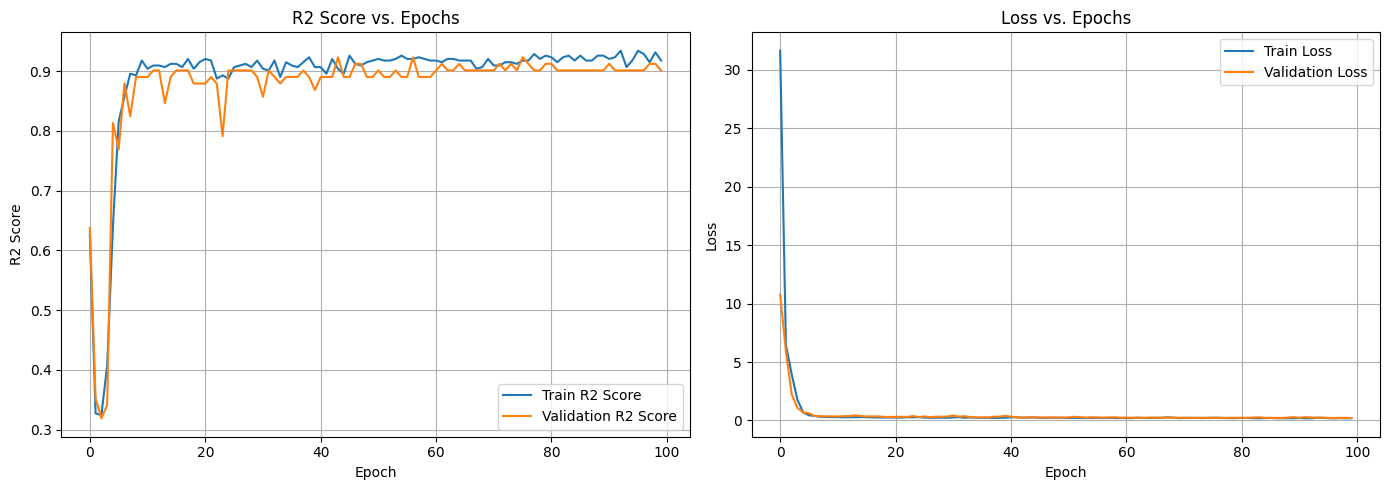

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'], label='Train R2 Score')
plt.plot(train.history['val_accuracy'], label='Validation R2 Score')
plt.title('R2 Score vs. Epochs')
plt.ylabel('R2 Score')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

# Buat grafik Loss
plt.subplot(1, 2, 2)
plt.plot(train.history['loss'], label='Train Loss')
plt.plot(train.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
     
